# Clustering images

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm


### Reading and resizing the image

***Resizing is important to reduce the size of the image and to improve the speed of the algorithm***

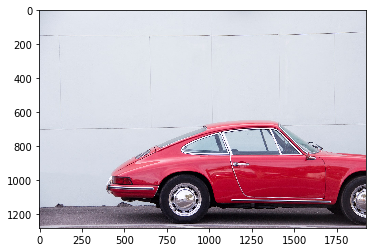

In [35]:
#loading and normalise the image
img = cv2.imread("josh-rinard-H9mp1P1VUj4-unsplash.jpg")/255

#Since openCV only supports upto float32 pixel values, we have to typecast our data 
img = img.astype(np.float32)

#to preserve the original color, we have to load the image in RGB sincwe by default OpenCV loads it in BGR format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#rescaling the image is required to reduce the data size and speed up ther algorithm

scale_percent = 20 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)  
# using the openCV resize function to appropriately resize the image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)



In [36]:
img = resized

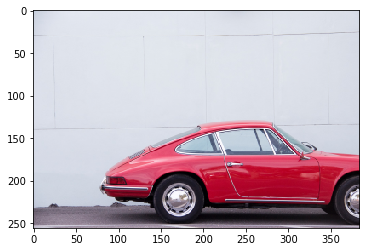

In [37]:
plt.imshow(img)

In [38]:
#convert the MxNx3 image to a Kx3 image where k = MxN
vectorised = img.reshape((-1,3))
#Convert the array to a dataframe
img_df = pd.DataFrame(vectorised)
img_df.rename(columns={0:'R', 1:'G', 2: 'B'}, inplace =True)

In [41]:
#taking random centroids for initial tests
centroids = img_df.sample(5)

In [42]:
centroids

,R,G,B
84603,0.160627,0.039529,0.063373
36349,0.870118,0.885804,0.921098
78235,0.676392,0.010353,0.154824
73824,0.948549,0.548235,0.624157
12516,0.869490,0.885176,0.920471


In [43]:
X = img_df

The overall algorithm remains the same as k-means clustering. This time we have the Red, Blue and Green pixels arranged as a flattenned array. In this form we can treat them as normal data points and apply ther original k-means algorithm.

**The Algorithm below takes alot of time to run (depending on your CPU). Efficiency is not the purpose of this code, it is only a demonstration of how you can segment images using K-means**

In [44]:
k = 5
diff = 1
j=0

while(abs(diff)>0.05):
    XD=X
    i=1
    #iterate over each centroid point 
    for index1,row_c in centroids.iterrows():
        ED=[]
        #iterate over each data point
        print("Calculating distance")
        for index2,row_d in tqdm(XD.iterrows()):
            #calculate distance between current point and centroid
            d1=(row_c["R"]-row_d["R"])**2
            d2=(row_c["G"]-row_d["G"])**2
            d3=(row_c["B"]-row_d["B"])**2
            d=np.sqrt(d1+d2+d3)
            #append disstance in a list 'ED'
            ED.append(d)
        #append distace for a centroid in original data frame
        X[i]=ED
        i=i+1

    C=[]
    print("Getting Centroid")
    for index,row in tqdm(X.iterrows()):
        #get distance from centroid of current data point
        min_dist=row[1]
        pos=1
        #loop to locate the closest centroid to current point
        for i in range(k):
            #if current distance is greater than that of other centroids
            if row[i+1] < min_dist:
                #the smaller distanc becomes the minimum distance 
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    #assigning the closest cluster to each data point
    X["Cluster"]=C
    #grouping each cluster by their mean value to create new centroids
    centroids_new = X.groupby(["Cluster"]).mean()[["R","G", "B"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        #check if there is a difference between old and new centroids
        diff = (centroids_new['R'] - centroids['R']).sum() + (centroids_new['G'] - centroids['G']).sum() + (centroids_new['B'] - centroids['B']).sum()
        print(diff.sum())
    centroids = X.groupby(["Cluster"]).mean()[["R","G","B"]]

1056it [00:00, 5199.95it/s]

Calculating distance


98304it [00:21, 4506.12it/s]
328it [00:00, 3218.70it/s]

Calculating distance


98304it [00:24, 4013.32it/s]
382it [00:00, 3785.79it/s]

Calculating distance


98304it [00:22, 4357.08it/s]
440it [00:00, 4360.59it/s]

Calculating distance


98304it [00:21, 4523.70it/s]
356it [00:00, 3545.31it/s]

Calculating distance


98304it [00:22, 4460.19it/s]
437it [00:00, 4330.84it/s]

Getting Centroid


98304it [00:21, 4562.09it/s]
401it [00:00, 3974.11it/s]

Calculating distance


98304it [00:23, 4269.40it/s]
473it [00:00, 4724.81it/s]

Calculating distance


98304it [00:20, 4692.40it/s]
459it [00:00, 4548.76it/s]

Calculating distance


98304it [00:21, 4646.30it/s]
384it [00:00, 3805.57it/s]

Calculating distance


98304it [00:22, 4419.71it/s]
414it [00:00, 4102.91it/s]

Calculating distance


98304it [00:20, 4710.35it/s]
482it [00:00, 4776.78it/s]

Getting Centroid


98304it [00:20, 4895.56it/s]
429it [00:00, 4251.25it/s]

-0.1790487
Calculating distance


98304it [00:21, 4476.22it/s]
445it [00:00, 4421.83it/s]

Calculating distance


98304it [00:22, 4453.21it/s]
445it [00:00, 4409.96it/s]

Calculating distance


98304it [00:21, 4558.22it/s]
343it [00:00, 3399.27it/s]

Calculating distance


98304it [00:24, 4076.01it/s]
1011it [00:00, 4987.07it/s]

Calculating distance


98304it [00:21, 4677.04it/s]
537it [00:00, 5321.84it/s]

Getting Centroid


98304it [00:18, 5228.84it/s]
431it [00:00, 4304.76it/s]

-0.10935239
Calculating distance


98304it [00:21, 4620.66it/s]
458it [00:00, 4538.94it/s]

Calculating distance


98304it [00:20, 4779.29it/s]
399it [00:00, 3954.13it/s]

Calculating distance


98304it [00:20, 4837.62it/s]
901it [00:00, 4274.77it/s]

Calculating distance


98304it [00:20, 4797.25it/s]
456it [00:00, 4519.10it/s]

Calculating distance


98304it [00:19, 5020.85it/s]
533it [00:00, 5281.97it/s]

Getting Centroid


98304it [00:18, 5428.51it/s]
479it [00:00, 4787.24it/s]

-0.09239505
Calculating distance


98304it [00:19, 5050.91it/s]
1041it [00:00, 5135.93it/s]

Calculating distance


98304it [00:19, 5084.67it/s]
499it [00:00, 4945.15it/s]

Calculating distance


98304it [00:19, 5074.97it/s]
963it [00:00, 4609.49it/s]

Calculating distance


98304it [00:19, 4990.87it/s]
491it [00:00, 4865.85it/s]

Calculating distance


98304it [00:19, 5100.47it/s]
534it [00:00, 5292.16it/s]

Getting Centroid


98304it [00:19, 5042.74it/s]
454it [00:00, 4499.18it/s]

-0.06743458
Calculating distance


98304it [00:20, 4775.40it/s]
960it [00:00, 4744.88it/s]

Calculating distance


98304it [00:20, 4857.05it/s]
1025it [00:00, 5041.78it/s]

Calculating distance


98304it [00:20, 4687.44it/s]
298it [00:00, 2831.25it/s]

Calculating distance


98304it [00:20, 4810.11it/s]
473it [00:00, 4687.44it/s]

Calculating distance


98304it [00:20, 4879.56it/s]
534it [00:00, 5331.60it/s]

Getting Centroid


98304it [00:19, 5066.84it/s]

-0.04773618


In [45]:
centroids = centroids.to_numpy()

In [46]:
labels = X["Cluster"].to_numpy()
segmented_image = centroids[labels-1]
segmented_image = segmented_image.reshape(img.shape)

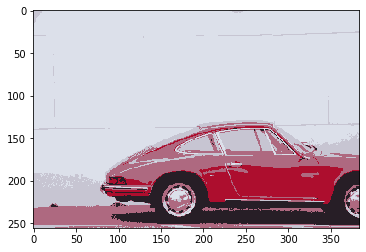

In [47]:
plt.imshow(segmented_image)